In [14]:
testing_loss = [1.034084714934803]

In [1]:
import os
import torch
import pickle

from MeLU import MeLU
from options import config
from model_training import training
from data_generation import generate
from evidence_candidate import selection
from tqdm import tqdm


if __name__ == "__main__":
    master_path= "./ml"
    if not os.path.exists("{}/".format(master_path)):
        os.mkdir("{}/".format(master_path))
        # preparing dataset. It needs about 22GB of your hard disk space.
        generate(master_path)

    # training model.
    melu = MeLU(config)
    state = "warm_state"
    model_filename = "{}/models_{}.pkl".format(master_path,state)
    if not os.path.exists(model_filename):
        # Load training dataset.
        training_set_size = int(len(os.listdir("{}/{}".format(master_path,state))) / 4)
        supp_xs_s = []
        supp_ys_s = []
        query_xs_s = []
        query_ys_s = []
        for idx in tqdm(range(training_set_size)):
            supp_xs_s.append(pickle.load(open("{}/{}/supp_x_{}.pkl".format(master_path,state, idx), "rb")))
            supp_ys_s.append(pickle.load(open("{}/{}/supp_y_{}.pkl".format(master_path, state, idx), "rb")))
            query_xs_s.append(pickle.load(open("{}/{}/query_x_{}.pkl".format(master_path, state, idx), "rb")))
            query_ys_s.append(pickle.load(open("{}/{}/query_y_{}.pkl".format(master_path, state, idx), "rb")))
        total_dataset = list(zip(supp_xs_s, supp_ys_s, query_xs_s, query_ys_s))
        del(supp_xs_s, supp_ys_s, query_xs_s, query_ys_s)
        history = training(melu, total_dataset, batch_size=config['batch_size'], num_epoch=config['num_epoch'], model_save=True, model_filename=model_filename)
    else:
        trained_state_dict = torch.load(model_filename)
        melu.load_state_dict(trained_state_dict)



C:\Users\rnautiyal2\Anaconda3\envs\charanfyp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 40/40 [20:28<00:00, 30.71s/it]


[15.04789192404523, 10.774335902809296, 2.744331348262377, 1.1073433128779366, 1.084205559836138, 1.065979686359431, 1.0496441925932096, 1.029211232726206, 1.0133191103103176, 0.9990510628527443, 0.9851462557011803, 0.9731094121132922, 0.9623292052505801, 0.9547229849252125, 0.9449432252237461, 0.941601102784176, 0.9336367309493506, 0.9296870243629353, 0.9250253530956755, 0.9210470206785522, 0.916814911685534, 0.9119486948787766, 0.9092628523807398, 0.9055765955240135, 0.9039491923063393, 0.9012053504886243, 0.8971437139799131, 0.8948530166741185, 0.8931822436767937, 0.8914932180571076, 0.8889431053360036, 0.887847023922325, 0.8859211250439586, 0.8859775146381967, 0.8838014810677343, 0.8807584823377981, 0.879267683365201, 0.8790819776938266, 0.8778767673761253, 0.876099604088188] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


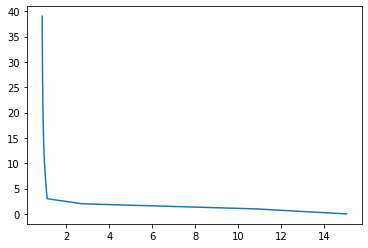

In [5]:
import matplotlib.pyplot as plt
y = list(range(0,len(history)))
print(history)
plt.plot(history,y)

In [6]:
state = "warm_state"
# model_filename = "{}/models_{}.pkl".format(master_path,state)
# if not os.path.exists(model_filename):
# Load training dataset.
testing_set_size = int(len(os.listdir("{}/{}".format('testing',state))) / 4)
supp_xs_s = []
supp_ys_s = []
query_xs_s = []
query_ys_s = []
for idx in tqdm(range(testing_set_size)):
    supp_xs_s.append(pickle.load(open("{}/{}/supp_x_{}.pkl".format('testing',state, idx), "rb")))
    supp_ys_s.append(pickle.load(open("{}/{}/supp_y_{}.pkl".format('testing', state, idx), "rb")))
    query_xs_s.append(pickle.load(open("{}/{}/query_x_{}.pkl".format('testing', state, idx), "rb")))
    query_ys_s.append(pickle.load(open("{}/{}/query_y_{}.pkl".format('testing', state, idx), "rb")))

100%|██████████| 260/260 [00:01<00:00, 237.88it/s]


In [16]:
from torch.nn import functional as F
trained_state_dict = torch.load(model_filename)
melu.load_state_dict(trained_state_dict)

final_loss = []
for i in range(len(supp_xs_s)):
    prediction = melu.model(supp_xs_s[i].cuda())
    temp_loss = F.mse_loss(prediction, supp_ys_s[i].cuda().view(-1, 1))
    final_loss.append(temp_loss.item())

for j in range(len(query_xs_s)):
    prediction = melu.model(query_xs_s[j].cuda())
    temp_loss = F.mse_loss(prediction, query_ys_s[j].cuda().view(-1, 1))
    final_loss.append(temp_loss.item())
testing_loss.append(np.mean(final_loss))

[1.034084714934803, 1.0145650416827545] [0, 1]


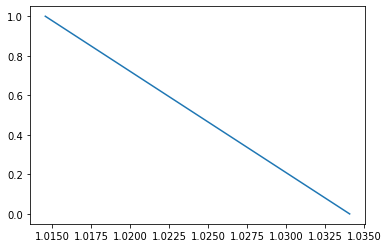

In [17]:
import numpy as np
y = list(range(len(testing_loss)))
print(testing_loss,y)
plt.plot(testing_loss,y)

In [ ]:

# selecting evidence candidates.
# evidence_candidate_list = selection(melu, master_path, config['num_candidate'])
# for movie, score in evidence_candidate_list:
#     print(movie, score)